In [ ]:
print('Группа: 20БИ-3')
print('ФИО: Игнатов Георгий Станиславович')
!ln -fs /usr/share/zoneinfo/Europe/Moscow /etc/localtime
!date

Группа: 20БИ-3
ФИО: Игнатов Георгий Станиславович
Thu Mar  4 16:12:05 MSK 2021


In [16]:
from google.colab import drive
drive.mount('/content/drive/')
import os
print(os.getcwd())
print(os.listdir('./'))
print(os.listdir('/content/drive'))
print(os.listdir('/content/drive/MyDrive/'))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content
['.config', 'drive', 'adc.json', 'sample_data']
['.shortcut-targets-by-id', 'MyDrive', '.file-revisions-by-id', '.Trash']
['Colab Notebooks', 'Список студентов, не явившихся на контрольную работу 11.11.2020.gsheet', 'filename.txt', 'Новая таблица.gsheet', 'rashodi.xlsx', 'rashodi.gsheet', 'cafe.ipynb', 'Без названия', 'doc2 (2).jpg', 'graph.png', 'kafe_colab.ipynb', 'KAFE2.gsheet', 'KAFE.xlsx']


Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)

РАБОТА С ТАБЛИЦЕЙ
total 447
-rw------- 1 root  53584 Feb 19 09:30  cafe.ipynb
drwx------ 2 root   4096 Oct 30 08:20 'Colab Notebooks'/
-rw------- 1 root 283152 Mar  4 11:10 'doc2 (2).jpg'
-rw------- 1 root      6 Nov 18 09:24  filename.txt
-rw------- 1 root  12013 Mar 25 18:32  graph.png
-rw------- 1 root    151 Mar 25 20:37  KAFE2.gsheet
-rw------- 1 root  38261 Mar 25 20:39  kafe_colab.ipynb
-rw------- 1 root    151 Mar 25 20:39  KAFE.gsheet
-rw------- 1 root  28979 Mar 25 20:38  KAFE.xlsx
-rw------- 1 root    151 Feb 19 09:20  rashodi.gsheet
-rw------- 1 root  28781 Feb 19 07:54  rashodi.xlsx
drwx------ 2 root   4096 Mar  3 19:59 'Без названия'/
-rw------- 1 root    151 Feb 19 07:51 'Новая таблица.gsheet'
-rw------- 1 root    151 Nov 17 19:24 'Список студентов, не явившихся на контрольную работу 11.11.2020.gsheet'
1 ['предоставление помещений под мероприятия', 'увеличение охвата аудитории', '3

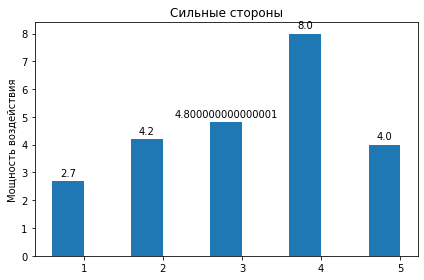

1 - предоставление помещений под мероприятия
2 - возможность получения прибыли
3 - качество продукции
4 - разнообразие меню
5 - удобное расположение


In [19]:
import os
import time
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from oauth2client.client import GoogleCredentials
print('\nРАБОТА С ТАБЛИЦЕЙ')
%ll -lAF /content/drive/MyDrive/
gs = gspread.authorize(GoogleCredentials.get_application_default())
os.stat('/content/drive/MyDrive/KAFE.gsheet')
table = gs.open_by_key('1iU-vyzOd_bMi2NZpy1BxN4RVzwPhCAUdG8aDMnSMPlU')
worksheet = table.worksheet('Strengths')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3])) #считается сила
    power_sh.append(power_raw)
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
strengths_sum = sum(power)
print('Суммарная сила сильный сторон:', strengths_sum)
worksheet.update('F2', strengths_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols: #добавление значений name
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4  #ширина колонок
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Сильные стороны')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    #Добавление значений над диграммами
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects) #значения над колонками
fig.tight_layout()
plt.show()              
j=0
for col in cols: #печать обозначений под диаграммой
  if(j>0):
    print(j, '-', col)
  j+=1

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)

РАБОТА С ТАБЛИЦЕЙ
total 452
-rw------- 1 root  53584 Feb 19 09:30  cafe.ipynb
drwx------ 2 root   4096 Oct 30 08:20 'Colab Notebooks'/
-rw------- 1 root 283152 Mar  4 11:10 'doc2 (2).jpg'
-rw------- 1 root      6 Nov 18 09:24  filename.txt
-rw------- 1 root  12013 Mar 25 18:32  graph.png
-rw------- 1 root    151 Mar 25 20:37  KAFE2.gsheet
-rw------- 1 root  42921 Mar 25 20:40  kafe_colab.ipynb
-rw------- 1 root    151 Mar 25 20:39  KAFE.gsheet
-rw------- 1 root  28979 Mar 25 20:38  KAFE.xlsx
-rw------- 1 root    151 Feb 19 09:20  rashodi.gsheet
-rw------- 1 root  28781 Feb 19 07:54  rashodi.xlsx
drwx------ 2 root   4096 Mar  3 19:59 'Без названия'/
-rw------- 1 root    151 Feb 19 07:51 'Новая таблица.gsheet'
-rw------- 1 root    151 Nov 17 19:24 'Список студентов, не явившихся на контрольную работу 11.11.2020.gsheet'
1 ['больничные персонала', 'уменьшение производительности труда', '7', '0.1', '0

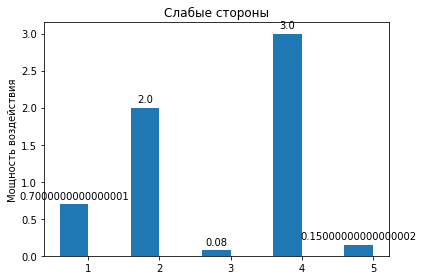

1 - больничные персонала
2 - ухудшение системы налогооблажения
3 - кража выручки
4 - низкая информированность клиентов
5 - ухудшение отзывов неблагоприятными клиентами


In [20]:
import os
import time
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from oauth2client.client import GoogleCredentials
print('\nРАБОТА С ТАБЛИЦЕЙ')
%ll -lAF /content/drive/MyDrive/
gs = gspread.authorize(GoogleCredentials.get_application_default())
os.stat('/content/drive/MyDrive/KAFE.gsheet')
table = gs.open_by_key('1iU-vyzOd_bMi2NZpy1BxN4RVzwPhCAUdG8aDMnSMPlU')
worksheet = table.worksheet('Weaknesses')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3])) #считается сила
    power_sh.append(power_raw)
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
weaknesses_sum = sum(power)
print('Суммарная сила сильный сторон:', weaknesses_sum)
worksheet.update('F2', weaknesses_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols: #добавление значений name
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4  #ширина колонок
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Слабые стороны')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    #Добавление значений над диграммами
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects) #значения над колонками
fig.tight_layout()
plt.show()              
j=0
for col in cols: #печать обозначений под диаграммой
  if(j>0):
    print(j, '-', col)
  j+=1

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)

РАБОТА С ТАБЛИЦЕЙ
total 455
-rw------- 1 root  53584 Feb 19 09:30  cafe.ipynb
drwx------ 2 root   4096 Oct 30 08:20 'Colab Notebooks'/
-rw------- 1 root 283152 Mar  4 11:10 'doc2 (2).jpg'
-rw------- 1 root      6 Nov 18 09:24  filename.txt
-rw------- 1 root  12013 Mar 25 18:32  graph.png
-rw------- 1 root    151 Mar 25 20:37  KAFE2.gsheet
-rw------- 1 root  46269 Mar 25 20:41  kafe_colab.ipynb
-rw------- 1 root    151 Mar 25 20:39  KAFE.gsheet
-rw------- 1 root  28979 Mar 25 20:38  KAFE.xlsx
-rw------- 1 root    151 Feb 19 09:20  rashodi.gsheet
-rw------- 1 root  28781 Feb 19 07:54  rashodi.xlsx
drwx------ 2 root   4096 Mar  3 19:59 'Без названия'/
-rw------- 1 root    151 Feb 19 07:51 'Новая таблица.gsheet'
-rw------- 1 root    151 Nov 17 19:24 'Список студентов, не явившихся на контрольную работу 11.11.2020.gsheet'
1 ['увеличение стартового капитала', 'повышение качества инвентаря заведения', '

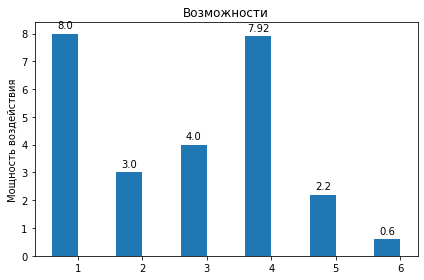

1 - увеличение стартового капитала
2 - повышение SMM-активности
3 - поиск лучших рецептур для блюд
4 - организация доставки
5 - найм юриста
6 - расширение сети


In [21]:
import os
import time
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from oauth2client.client import GoogleCredentials
print('\nРАБОТА С ТАБЛИЦЕЙ')
%ll -lAF /content/drive/MyDrive/
gs = gspread.authorize(GoogleCredentials.get_application_default())
os.stat('/content/drive/MyDrive/KAFE.gsheet')
table = gs.open_by_key('1iU-vyzOd_bMi2NZpy1BxN4RVzwPhCAUdG8aDMnSMPlU')
worksheet = table.worksheet('Opportunities')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3])) #считается сила
    power_sh.append(power_raw)
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
opportunities_sum = sum(power)
print('Суммарная сила сильный сторон:', opportunities_sum)
worksheet.update('F2', opportunities_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols: #добавление значений name
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4  #ширина колонок
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Возможности')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    #Добавление значений над диграммами
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects) #значения над колонками
fig.tight_layout()
plt.show()              
j=0
for col in cols: #печать обозначений под диаграммой
  if(j>0):
    print(j, '-', col)
  j+=1

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)

РАБОТА С ТАБЛИЦЕЙ
total 473
-rw------- 1 root  53584 Feb 19 09:30  cafe.ipynb
drwx------ 2 root   4096 Oct 30 08:20 'Colab Notebooks'/
-rw------- 1 root 283152 Mar  4 11:10 'doc2 (2).jpg'
-rw------- 1 root      6 Nov 18 09:24  filename.txt
-rw------- 1 root  12013 Mar 25 18:32  graph.png
-rw------- 1 root    151 Mar 25 20:37  KAFE2.gsheet
-rw------- 1 root  64213 Mar 25 20:42  kafe_colab.ipynb
-rw------- 1 root    151 Mar 25 20:39  KAFE.gsheet
-rw------- 1 root  28979 Mar 25 20:38  KAFE.xlsx
-rw------- 1 root    151 Feb 19 09:20  rashodi.gsheet
-rw------- 1 root  28781 Feb 19 07:54  rashodi.xlsx
drwx------ 2 root   4096 Mar  3 19:59 'Без названия'/
-rw------- 1 root    151 Feb 19 07:51 'Новая таблица.gsheet'
-rw------- 1 root    151 Nov 17 19:24 'Список студентов, не явившихся на контрольную работу 11.11.2020.gsheet'
1 ['конкуренция', 'повышение качества продукции', '9', '0.5', '4.5']
2 ['текучка

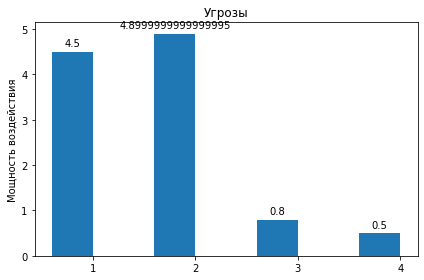

1 - конкуренция
2 - текучка персонала
3 - наличие неадекватных клиентов
4 - брак поставляемой пищи


In [22]:
import os
import time
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from oauth2client.client import GoogleCredentials
print('\nРАБОТА С ТАБЛИЦЕЙ')
%ll -lAF /content/drive/MyDrive/
gs = gspread.authorize(GoogleCredentials.get_application_default())
os.stat('/content/drive/MyDrive/KAFE.gsheet')
table = gs.open_by_key('1iU-vyzOd_bMi2NZpy1BxN4RVzwPhCAUdG8aDMnSMPlU')
worksheet = table.worksheet('Threats')
rows = worksheet.get_all_values()
name = list()
actions = list()
importance = list()
probability = list()
power = list()
power_sh = list()
power_raw = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    name.append(row[0])
    actions.append(row[1])
    importance.append(int(row[2]))
    probability.append(float(row[3]))
    power.append(int(row[2])*float(row[3]))
    power_raw = list()
    power_raw.append(int(row[2])*float(row[3])) #считается сила
    power_sh.append(power_raw)
  i+=1
worksheet.update('E2:E8', power_sh)
print('\n',name, actions, importance, probability, power, sep='\n', end='\n\n')
threats_sum = sum(power)
print('Суммарная сила сильный сторон:', threats_sum)
worksheet.update('F2', threats_sum)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
i=0
labels = list()
cols = worksheet.col_values(1)
for col in cols: #добавление значений name
  if(i>0):
    labels.append(i)
  i+=1
width = 0.4  #ширина колонок
fig, ax = plt.subplots()
x = np.arange(len(labels))
rects = ax.bar(x - width/2, power, width)
ax.set_ylabel('Мощность воздействия')
ax.set_title('Угрозы')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    #Добавление значений над диграммами
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects) #значения над колонками
fig.tight_layout()
plt.show()              
j=0
for col in cols: #печать обозначений под диаграммой
  if(j>0):
    print(j, '-', col)
  j+=1

Результат: 32.78999999999999


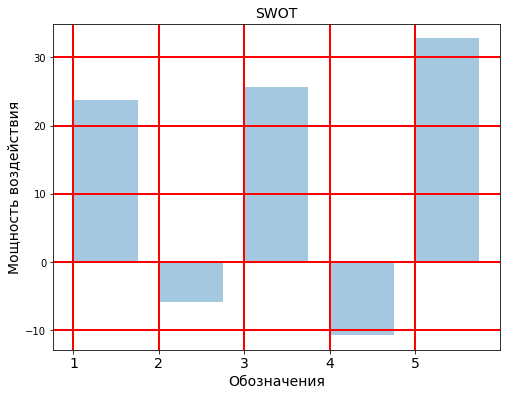

1  -  Сильные стороны
2  -  Слабые стороны
3  -  Возможности
4  -  Угорозы
5  -  Результат


In [23]:
#копирование значений силы из листов
worksheet = table.worksheet('Strengths')
strengths_power = worksheet.acell('F2').value
worksheet = table.worksheet('Weaknesses')
weaknesses_power = worksheet.acell('F2').value
worksheet = table.worksheet('Opportunities')
opportunities_power = worksheet.acell('F2').value
worksheet = table.worksheet('Threats')
threats_power = worksheet.acell('F2').value
#добавление в таблицу result
worksheet = table.worksheet('Result')
worksheet.update('A1', 'Суммарная сила сильных сторон')
worksheet.update('A2', strengths_power)
worksheet.update('B1', 'Суммарная сила слабых сторон') 
worksheet.update('B2', weaknesses_power)
worksheet.update('A4', 'Суммарная сила возможностей') 
worksheet.update('A5', opportunities_power)
worksheet.update('B4', 'Суммарная сила угроз') 
worksheet.update('B5', threats_power)
#подсчет результата анализа и добавление его в таблицу
result = float(strengths_power) - 1*float(weaknesses_power) + float(opportunities_power) - 1*float(threats_power)
print('Результат:', result)
worksheet = table.worksheet('Result')
worksheet.update('A7', 'Результат')
worksheet.update('A8', result)
#создание графика
def matplot(element):
    import matplotlib.pyplot as plt
    x=list()
    x_float=list()
    title=list()
    y_float=list()
x_float = [1, 2, 3, 4, 5]
y_float = [float(strengths_power), -1*float(weaknesses_power), float(opportunities_power), -1*float(threats_power),  result]
title = [ "Сильные стороны", "Слабые стороны", "Возможности", "Угорозы", "Результат"]
x_pos=list()
i=0
for i in range(x_float.__len__()):
  x_pos.append(i)

fig=plt.figure(figsize=(8,6), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.4)
plt.xticks(x_pos,  x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Мощность воздействия', fontsize=14)
plt.title('SWOT', fontsize=14)
plt.grid(True, color='r', linestyle='-', linewidth=2)
plt.show()
#печать заголовков
for i in range(title.__len__()):
  print(i+1, " - ", title[i])
  i += 1